# üìä An√°lisis Exploratorio: Limpieza de Datos

## üéØ Objetivo
Este notebook analiza el dataset crudo de bicicletas p√∫blicas de Buenos Aires para **analizar las decisiones de limpieza** que implementamos en `src/utils.py`.

### üîç Decisiones a Analizar:
1. **Duraci√≥n m√≠nima**: Eliminar recorridos < 60 segundos
2. **Rango temporal**: Filtrar datos antes de cierta fecha  
3. **Edades v√°lidas**: Usuarios entre 10-100 a√±os
4. **Coordenadas v√°lidas**: Estaciones con lat/lng v√°lidas
5. **IDs v√°lidos**: Eliminar registros con IDs faltantes

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n de gr√°ficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("üìö Librer√≠as cargadas correctamente")
print(f"üìÖ An√°lisis ejecutado: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


üìö Librer√≠as cargadas correctamente
üìÖ An√°lisis ejecutado: 2025-07-02 01:02:26


In [2]:
# Cargar datos crudos (sin limpieza)
print("üîÑ Cargando datos crudos...")

# Funci√≥n para cargar sin limpieza
def load_raw_data(path):
    try:
        df = pd.read_csv(path, parse_dates=['fecha_origen_recorrido', 'fecha_destino_recorrido'], low_memory=False)
        print(f"‚úÖ {path}: {len(df):,} registros")
        return df
    except Exception as e:
        print(f"‚ùå Error cargando {path}: {e}")
        return None

# Intentar cargar diferentes a√±os
datasets = {}
for year in [2020, 2021, 2022, 2023, 2024]:
    df = load_raw_data(f'data/raw/trips_{year}.csv')
    if df is not None:
        datasets[year] = df

print(f"\nüìä Datasets cargados: {len(datasets)} a√±os")
total_records = sum(len(df) for df in datasets.values())
print(f"üìà Total registros crudos: {total_records:,}")


üîÑ Cargando datos crudos...
‚úÖ data/raw/trips_2020.csv: 2,415,597 registros
‚úÖ data/raw/trips_2021.csv: 2,860,091 registros
‚úÖ data/raw/trips_2022.csv: 2,922,805 registros
‚úÖ data/raw/trips_2023.csv: 2,622,331 registros
‚úÖ data/raw/trips_2024.csv: 3,559,284 registros

üìä Datasets cargados: 5 a√±os
üìà Total registros crudos: 14,380,108


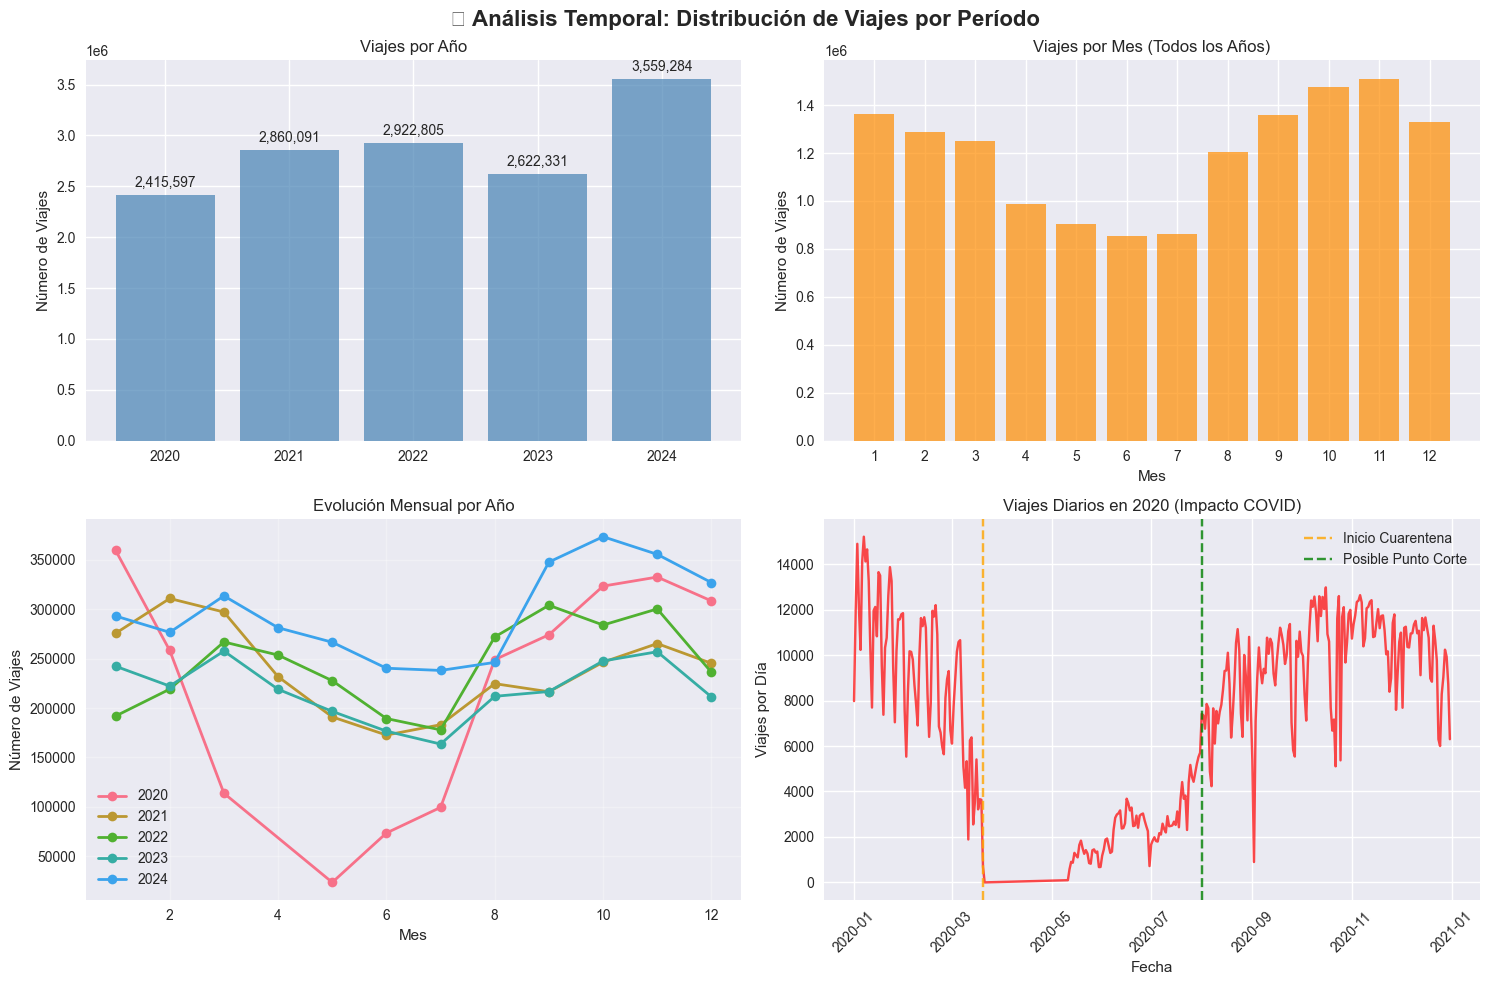


üìä CONCLUSIONES TEMPORALES:
‚Ä¢ Total de viajes: 14,380,108
‚Ä¢ A√±o con m√°s viajes: 2024 (3,559,284 viajes)
‚Ä¢ Mes con m√°s viajes: 11 (1,510,600 viajes)

üîç AN√ÅLISIS 2020:
‚Ä¢ Viajes antes de agosto 2020: 928,136 (38.4%)
‚Ä¢ Viajes despu√©s de agosto 2020: 1,487,461 (61.6%)
‚Ä¢ Promedio diario pre-agosto: 4357 viajes/d√≠a
‚Ä¢ Promedio diario post-agosto: 9722 viajes/d√≠a


In [4]:
# An√°lisis temporal por a√±o y mes
if datasets:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('üìÖ An√°lisis Temporal: Distribuci√≥n de Viajes por Per√≠odo', fontsize=16, fontweight='bold')
    
    # 1. Viajes por a√±o
    yearly_counts = {year: len(df) for year, df in datasets.items()}
    axes[0,0].bar(yearly_counts.keys(), yearly_counts.values(), color='steelblue', alpha=0.7)
    axes[0,0].set_title('Viajes por A√±o')
    axes[0,0].set_ylabel('N√∫mero de Viajes')
    for i, (year, count) in enumerate(yearly_counts.items()):
        axes[0,0].text(year, count + 50000, f'{count:,}', ha='center', va='bottom')
    
    # 2. Viajes por mes (todos los a√±os combinados)
    all_data = pd.concat(datasets.values(), ignore_index=True)
    all_data['mes'] = all_data['fecha_origen_recorrido'].dt.month
    monthly_counts = all_data['mes'].value_counts().sort_index()
    
    axes[0,1].bar(monthly_counts.index, monthly_counts.values, color='darkorange', alpha=0.7)
    axes[0,1].set_title('Viajes por Mes (Todos los A√±os)')
    axes[0,1].set_xlabel('Mes')
    axes[0,1].set_ylabel('N√∫mero de Viajes')
    axes[0,1].set_xticks(range(1, 13))
    
    # 3. Evoluci√≥n mensual por a√±o
    for year, df in datasets.items():
        df['mes'] = df['fecha_origen_recorrido'].dt.month
        monthly = df['mes'].value_counts().sort_index()
        axes[1,0].plot(monthly.index, monthly.values, marker='o', label=f'{year}', linewidth=2)
    
    axes[1,0].set_title('Evoluci√≥n Mensual por A√±o')
    axes[1,0].set_xlabel('Mes')
    axes[1,0].set_ylabel('N√∫mero de Viajes')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. An√°lisis espec√≠fico 2020 (COVID impact)
    if 2020 in datasets:
        df_2020 = datasets[2020].copy()
        df_2020['fecha'] = df_2020['fecha_origen_recorrido'].dt.date
        daily_2020 = df_2020.groupby('fecha').size()
        
        axes[1,1].plot(daily_2020.index, daily_2020.values, color='red', alpha=0.7)
        axes[1,1].set_title('Viajes Diarios en 2020 (Impacto COVID)')
        axes[1,1].set_xlabel('Fecha')
        axes[1,1].set_ylabel('Viajes por D√≠a')
        axes[1,1].tick_params(axis='x', rotation=45)
        
        # Marcar per√≠odos importantes
        axes[1,1].axvline(pd.to_datetime('2020-03-20').date(), color='orange', linestyle='--', alpha=0.8, label='Inicio Cuarentena')
        axes[1,1].axvline(pd.to_datetime('2020-08-01').date(), color='green', linestyle='--', alpha=0.8, label='Posible Punto Corte')
        axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Estad√≠sticas clave
    print("\nüìä CONCLUSIONES TEMPORALES:")
    print(f"‚Ä¢ Total de viajes: {len(all_data):,}")
    print(f"‚Ä¢ A√±o con m√°s viajes: {max(yearly_counts, key=yearly_counts.get)} ({max(yearly_counts.values()):,} viajes)")
    print(f"‚Ä¢ Mes con m√°s viajes: {monthly_counts.idxmax()} ({monthly_counts.max():,} viajes)")
    
    if 2020 in datasets:
        pre_aug = df_2020[df_2020['fecha_origen_recorrido'] < '2020-08-01']
        post_aug = df_2020[df_2020['fecha_origen_recorrido'] >= '2020-08-01']
        print(f"\nüîç AN√ÅLISIS 2020:")
        print(f"‚Ä¢ Viajes antes de agosto 2020: {len(pre_aug):,} ({len(pre_aug)/len(df_2020)*100:.1f}%)")
        print(f"‚Ä¢ Viajes despu√©s de agosto 2020: {len(post_aug):,} ({len(post_aug)/len(df_2020)*100:.1f}%)")
        print(f"‚Ä¢ Promedio diario pre-agosto: {len(pre_aug)/213:.0f} viajes/d√≠a")
        print(f"‚Ä¢ Promedio diario post-agosto: {len(post_aug)/153:.0f} viajes/d√≠a")


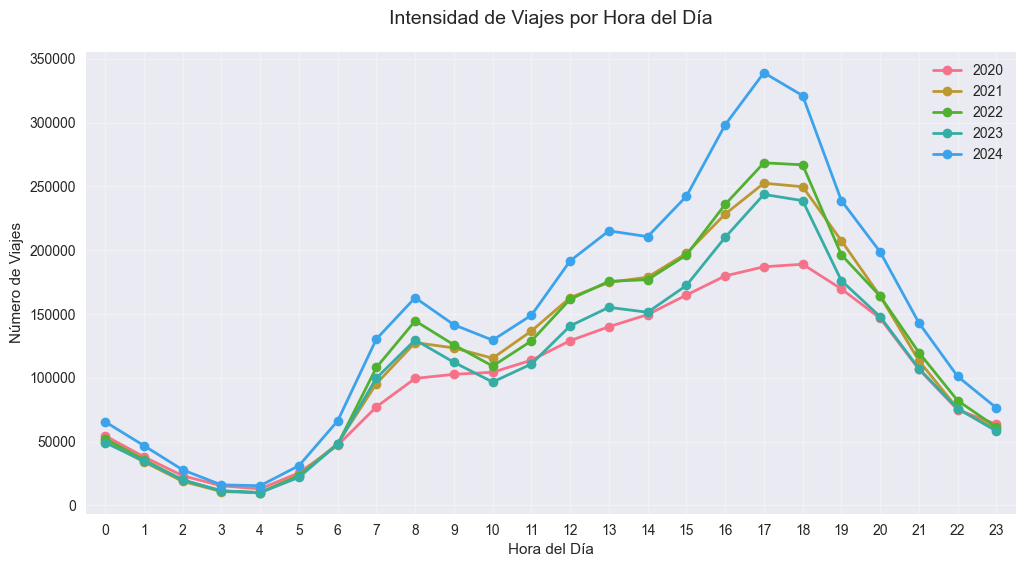


‚è∞ AN√ÅLISIS POR HORA:
‚Ä¢ Hora pico: 17:00 (1,291,124 viajes)
‚Ä¢ Distribuci√≥n por per√≠odos:
  - Ma√±ana (6-12h): 22.5%
  - Tarde (12-18h): 41.2%
  - Noche (18-24h): 30.6%
  - Madrugada (0-6h): 5.7%


In [5]:
# An√°lisis de intensidad de viajes por hora del d√≠a
plt.figure(figsize=(12, 6))

# Extraer la hora de los viajes
for year, df in datasets.items():
    df['hora'] = df['fecha_origen_recorrido'].dt.hour
    hourly = df['hora'].value_counts().sort_index()
    
    plt.plot(hourly.index, hourly.values, marker='o', label=f'{year}', linewidth=2)

plt.title('Intensidad de Viajes por Hora del D√≠a', fontsize=14, pad=20)
plt.xlabel('Hora del D√≠a')
plt.ylabel('N√∫mero de Viajes')
plt.grid(True, alpha=0.3)
plt.legend()

# Ajustar ejes
plt.xticks(range(0,24))
plt.xlim(-0.5, 23.5)

plt.show()

# Estad√≠sticas de horas pico
print("\n‚è∞ AN√ÅLISIS POR HORA:")
all_data['hora'] = all_data['fecha_origen_recorrido'].dt.hour
hora_pico = all_data['hora'].value_counts().idxmax()
viajes_pico = all_data['hora'].value_counts().max()
print(f"‚Ä¢ Hora pico: {hora_pico}:00 ({viajes_pico:,} viajes)")
print(f"‚Ä¢ Distribuci√≥n por per√≠odos:")
print(f"  - Ma√±ana (6-12h): {len(all_data[all_data['hora'].between(6,11)])/len(all_data)*100:.1f}%")
print(f"  - Tarde (12-18h): {len(all_data[all_data['hora'].between(12,17)])/len(all_data)*100:.1f}%")
print(f"  - Noche (18-24h): {len(all_data[all_data['hora'].between(18,23)])/len(all_data)*100:.1f}%")
print(f"  - Madrugada (0-6h): {len(all_data[all_data['hora'].between(0,5)])/len(all_data)*100:.1f}%")


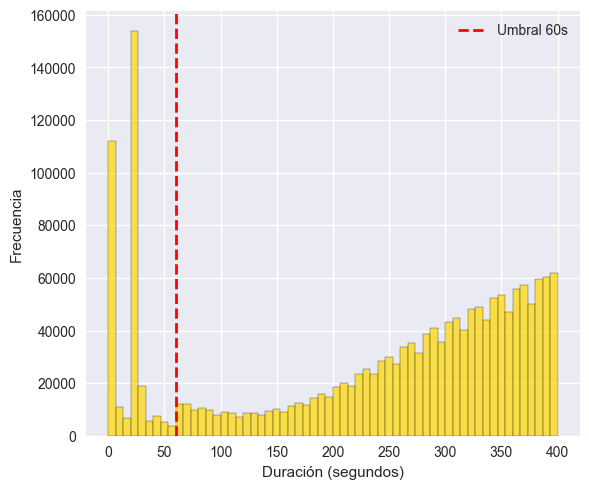


üìä ESTAD√çSTICAS DE DURACI√ìN:
‚Ä¢ Total registros con duraci√≥n v√°lida: 14,380,108
‚Ä¢ Duraci√≥n m√≠nima: 0 segundos
‚Ä¢ Duraci√≥n m√°xima: 19433313 segundos
‚Ä¢ Duraci√≥n promedio: 1370 segundos
‚Ä¢ Duraci√≥n mediana: 973 segundos

üîç AN√ÅLISIS DE VIAJES CORTOS:
‚Ä¢ Viajes < 60 segundos: 324,388 (2.26%)
‚Ä¢ Viajes 60-300 segundos: 651,443 (4.53%)
‚Ä¢ Duraci√≥n promedio de viajes < 60s: 16.4 segundos

üí° JUSTIFICACI√ìN UMBRAL 60s:
‚Ä¢ Eliminar 324,388 registros sospechosos (2.26% del total)
‚Ä¢ Recorridos < 60s probablemente son errores del sistema o cancelaciones
‚Ä¢ Tiempo insuficiente para un viaje real en bicicleta


In [8]:
# An√°lisis de duraci√≥n de recorridos
if datasets:
    # sample_data = pd.concat(list(datasets.values())[:2], ignore_index=True)  # Usar solo 2 a√±os para velocidad
    
    # Convertir duraci√≥n a num√©rico para todos los datasets
    for year, df in datasets.items():
        df['duracion_recorrido'] = pd.to_numeric(
            df['duracion_recorrido'].astype(str).str.replace(',', ''), 
            errors='coerce'
        )
    
    # Concatenar todos los datasets
    valid_duration = pd.concat(datasets.values(), ignore_index=True)
    valid_duration = valid_duration.dropna(subset=['duracion_recorrido'])

    
    # # Convertir duraci√≥n a num√©rico
    # datasets['duracion_recorrido'] = pd.to_numeric(
    #     datasets['duracion_recorrido'].astype(str).str.replace(',', ''), 
    #     errors='coerce'
    # )
    
    # # Filtrar valores v√°lidos
    # valid_duration = datasets.dropna(subset=['duracion_recorrido'])
    
    # 3. Zoom en duraciones cortas (0-300 segundos)
    short_trips = valid_duration[valid_duration['duracion_recorrido'] <= 400]
    fig,ax = plt.subplots(figsize=(6,5))
    ax.hist(short_trips['duracion_recorrido'], bins=60, alpha=0.7, color='gold', edgecolor='black')
    # ax.set_title('Zoom: Recorridos ‚â§ 5 minutos')
    ax.set_xlabel('Duraci√≥n (segundos)')
    ax.set_ylabel('Frecuencia')
    ax.axvline(60, color='red', linestyle='--', linewidth=2, label='Umbral 60s')
    ax.legend()
    
    # Rotar etiquetas
    for ax in axes.flat:
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Estad√≠sticas de duraci√≥n
    print("\nüìä ESTAD√çSTICAS DE DURACI√ìN:")
    print(f"‚Ä¢ Total registros con duraci√≥n v√°lida: {len(valid_duration):,}")
    print(f"‚Ä¢ Duraci√≥n m√≠nima: {valid_duration['duracion_recorrido'].min():.0f} segundos")
    print(f"‚Ä¢ Duraci√≥n m√°xima: {valid_duration['duracion_recorrido'].max():.0f} segundos")
    print(f"‚Ä¢ Duraci√≥n promedio: {valid_duration['duracion_recorrido'].mean():.0f} segundos")
    print(f"‚Ä¢ Duraci√≥n mediana: {valid_duration['duracion_recorrido'].median():.0f} segundos")
    
    # An√°lisis espec√≠fico de viajes muy cortos
    very_short = valid_duration[valid_duration['duracion_recorrido'] < 60]
    short_60_300 = valid_duration[(valid_duration['duracion_recorrido'] >= 60) & (valid_duration['duracion_recorrido'] < 300)]
    
    print(f"\nüîç AN√ÅLISIS DE VIAJES CORTOS:")
    print(f"‚Ä¢ Viajes < 60 segundos: {len(very_short):,} ({len(very_short)/len(valid_duration)*100:.2f}%)")
    print(f"‚Ä¢ Viajes 60-300 segundos: {len(short_60_300):,} ({len(short_60_300)/len(valid_duration)*100:.2f}%)")
    print(f"‚Ä¢ Duraci√≥n promedio de viajes < 60s: {very_short['duracion_recorrido'].mean():.1f} segundos")
    
    print(f"\nüí° JUSTIFICACI√ìN UMBRAL 60s:")
    print(f"‚Ä¢ Eliminar {len(very_short):,} registros sospechosos ({len(very_short)/len(valid_duration)*100:.2f}% del total)")
    print(f"‚Ä¢ Recorridos < 60s probablemente son errores del sistema o cancelaciones")
    print(f"‚Ä¢ Tiempo insuficiente para un viaje real en bicicleta")


## üöâ An√°lisis 3: Frecuencia de Uso de Estaciones

**Pregunta**: ¬øExisten estaciones "fantasma" que nunca reciben ni env√≠an bicicletas?

Este an√°lisis identifica estaciones con muy poca o nula actividad que podr√≠an ser eliminadas del dataset para mejorar la calidad de los modelos predictivos.


üîÑ Analizando frecuencia de uso de estaciones...
üìä Analizando 5,545,136 viajes de [2022, 2023]
üöÄ Estaciones de origen √∫nicas: 373
üéØ Estaciones de destino √∫nicas: 377

üìà ESTAD√çSTICAS GENERALES:
‚Ä¢ Total de estaciones identificadas: 377
‚Ä¢ Estaciones con tr√°fico = 0: 0
‚Ä¢ Estaciones con tr√°fico < 10: 5
‚Ä¢ Estaciones con tr√°fico < 5000: 53
‚Ä¢ Tr√°fico promedio por estaci√≥n: 29417.2 viajes
‚Ä¢ Tr√°fico mediano por estaci√≥n: 23156.0 viajes


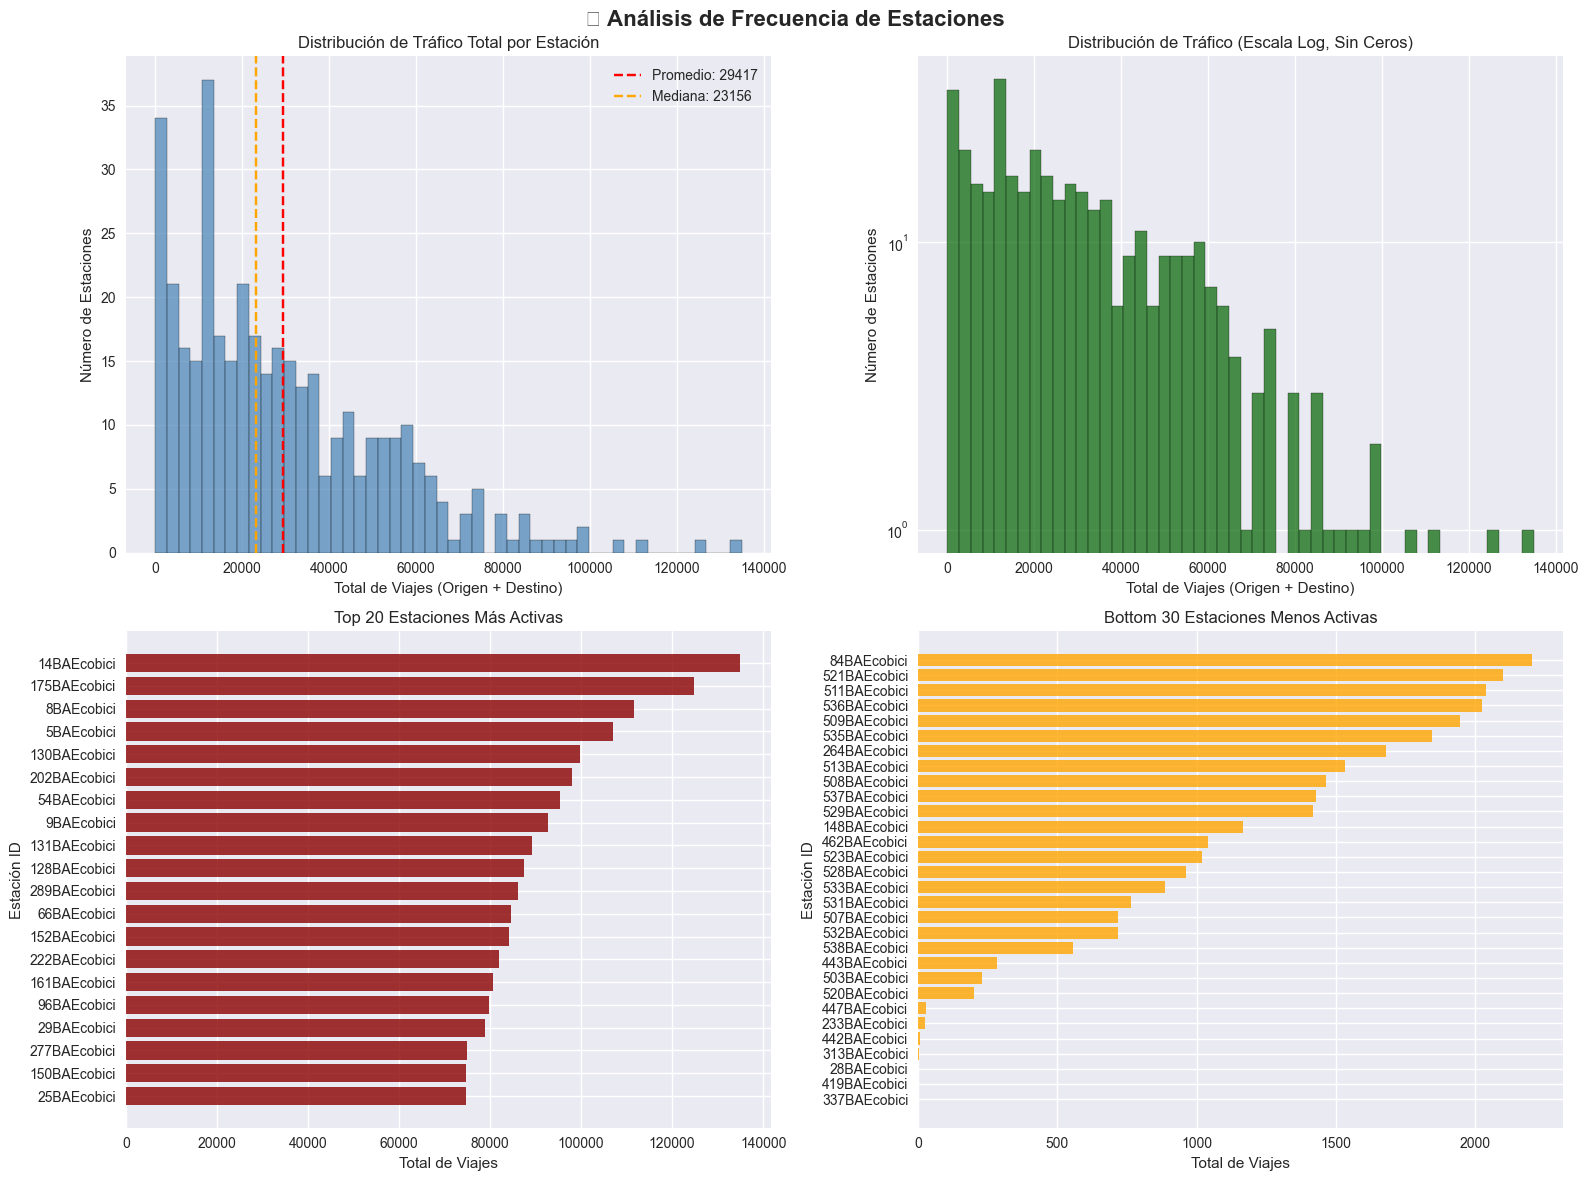

In [13]:
# An√°lisis de frecuencia de estaciones
print("üîÑ Analizando frecuencia de uso de estaciones...")

if datasets:
    # Usar datos de 2022 y 2023 para el an√°lisis (buen balance entre volumen y velocidad)
    sample_years = [2022, 2023]
    station_data = pd.concat([datasets[year] for year in sample_years if year in datasets], ignore_index=True)
    
    print(f"üìä Analizando {len(station_data):,} viajes de {sample_years}")
    
    # Contar viajes por estaci√≥n de origen
    estaciones_origen = station_data['id_estacion_origen'].value_counts()
    print(f"üöÄ Estaciones de origen √∫nicas: {len(estaciones_origen)}")
    
    # Contar viajes por estaci√≥n de destino
    estaciones_destino = station_data['id_estacion_destino'].value_counts()
    print(f"üéØ Estaciones de destino √∫nicas: {len(estaciones_destino)}")
    
    # Combinar todas las estaciones (origen + destino) para tr√°fico total
    all_stations_origin = station_data['id_estacion_origen'].value_counts()
    all_stations_dest = station_data['id_estacion_destino'].value_counts()
    
    # Crear √≠ndice completo de todas las estaciones
    all_station_ids = set(all_stations_origin.index) | set(all_stations_dest.index)
    
    # Calcular tr√°fico total por estaci√≥n (origen + destino)
    trafico_total = pd.Series(index=list(all_station_ids), dtype=int).fillna(0)
    
    for station_id in all_station_ids:
        origen_count = all_stations_origin.get(station_id, 0)
        destino_count = all_stations_dest.get(station_id, 0)
        trafico_total[station_id] = origen_count + destino_count
    
    # Ordenar por tr√°fico total
    trafico_total = trafico_total.sort_values(ascending=False)
    
    print(f"\nüìà ESTAD√çSTICAS GENERALES:")
    print(f"‚Ä¢ Total de estaciones identificadas: {len(trafico_total)}")
    print(f"‚Ä¢ Estaciones con tr√°fico = 0: {(trafico_total == 0).sum()}")
    print(f"‚Ä¢ Estaciones con tr√°fico < 10: {(trafico_total < 10).sum()}")
    print(f"‚Ä¢ Estaciones con tr√°fico < 5000: {(trafico_total < 5000).sum()}")
    print(f"‚Ä¢ Tr√°fico promedio por estaci√≥n: {trafico_total.mean():.1f} viajes")
    print(f"‚Ä¢ Tr√°fico mediano por estaci√≥n: {trafico_total.median():.1f} viajes")
    
    # Crear visualizaciones
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('üöâ An√°lisis de Frecuencia de Estaciones', fontsize=16, fontweight='bold')
    
    # 1. Distribuci√≥n de tr√°fico total (escala normal)
    axes[0,0].hist(trafico_total, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[0,0].set_title('Distribuci√≥n de Tr√°fico Total por Estaci√≥n')
    axes[0,0].set_xlabel('Total de Viajes (Origen + Destino)')
    axes[0,0].set_ylabel('N√∫mero de Estaciones')
    axes[0,0].axvline(trafico_total.mean(), color='red', linestyle='--', label=f'Promedio: {trafico_total.mean():.0f}')
    axes[0,0].axvline(trafico_total.median(), color='orange', linestyle='--', label=f'Mediana: {trafico_total.median():.0f}')
    axes[0,0].legend()
    
    # 2. Distribuci√≥n en escala logar√≠tmica
    trafico_no_zero = trafico_total[trafico_total > 0]
    axes[0,1].hist(trafico_no_zero, bins=50, alpha=0.7, color='darkgreen', edgecolor='black')
    axes[0,1].set_title('Distribuci√≥n de Tr√°fico (Escala Log, Sin Ceros)')
    axes[0,1].set_xlabel('Total de Viajes (Origen + Destino)')
    axes[0,1].set_ylabel('N√∫mero de Estaciones')
    axes[0,1].set_yscale('log')
    
    # 3. Top 20 estaciones m√°s activas
    top_20 = trafico_total.head(20)
    axes[1,0].barh(range(len(top_20)), top_20.values, color='darkred', alpha=0.8)
    axes[1,0].set_title('Top 20 Estaciones M√°s Activas')
    axes[1,0].set_xlabel('Total de Viajes')
    axes[1,0].set_ylabel('Estaci√≥n ID')
    axes[1,0].set_yticks(range(len(top_20)))
    axes[1,0].set_yticklabels([str(id)[:15] + '...' if len(str(id)) > 15 else str(id) for id in top_20.index])
    axes[1,0].invert_yaxis()
    
    # 4. Estaciones con poco tr√°fico (bottom 30)
    bottom_30 = trafico_total.tail(30)
    axes[1,1].barh(range(len(bottom_30)), bottom_30.values, color='orange', alpha=0.8)
    axes[1,1].set_title('Bottom 30 Estaciones Menos Activas')
    axes[1,1].set_xlabel('Total de Viajes')
    axes[1,1].set_ylabel('Estaci√≥n ID')
    axes[1,1].set_yticks(range(len(bottom_30)))
    axes[1,1].set_yticklabels([str(id)[:15] + '...' if len(str(id)) > 15 else str(id) for id in bottom_30.index])
    axes[1,1].invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
else:
    print("‚ùå No hay datos disponibles para el an√°lisis")


In [8]:
# An√°lisis detallado de estaciones problem√°ticas
if datasets and 'trafico_total' in locals():
    print("üîç AN√ÅLISIS DETALLADO DE ESTACIONES PROBLEM√ÅTICAS")
    print("=" * 60)
    
    # Identificar estaciones fantasma (0 viajes)
    estaciones_fantasma = trafico_total[trafico_total == 0]
    
    # Estaciones con muy poco tr√°fico (< 10 viajes en 2 a√±os)
    estaciones_poco_activas = trafico_total[(trafico_total > 0) & (trafico_total < 10)]
    
    # Estaciones con tr√°fico bajo (< 100 viajes en 2 a√±os)
    estaciones_trafico_bajo = trafico_total[(trafico_total >= 10) & (trafico_total < 100)]
    
    print(f"\nüëª ESTACIONES FANTASMA (0 viajes):")
    print(f"‚Ä¢ Cantidad: {len(estaciones_fantasma)}")
    if len(estaciones_fantasma) > 0:
        print(f"‚Ä¢ IDs: {list(estaciones_fantasma.index[:10])}{'...' if len(estaciones_fantasma) > 10 else ''}")
        print(f"‚Ä¢ Representan {len(estaciones_fantasma)/len(trafico_total)*100:.1f}% del total de estaciones")
    
    print(f"\n‚ö†Ô∏è ESTACIONES POCO ACTIVAS (1-9 viajes):")
    print(f"‚Ä¢ Cantidad: {len(estaciones_poco_activas)}")
    if len(estaciones_poco_activas) > 0:
        print(f"‚Ä¢ Promedio de viajes: {estaciones_poco_activas.mean():.1f}")
        print(f"‚Ä¢ Representan {len(estaciones_poco_activas)/len(trafico_total)*100:.1f}% del total de estaciones")
        print(f"‚Ä¢ Ejemplos: {dict(estaciones_poco_activas.head(5))}")
    
    print(f"\nüî∏ ESTACIONES TR√ÅFICO BAJO (10-99 viajes):")
    print(f"‚Ä¢ Cantidad: {len(estaciones_trafico_bajo)}")
    if len(estaciones_trafico_bajo) > 0:
        print(f"‚Ä¢ Promedio de viajes: {estaciones_trafico_bajo.mean():.1f}")
        print(f"‚Ä¢ Representan {len(estaciones_trafico_bajo)/len(trafico_total)*100:.1f}% del total de estaciones")
    
    # An√°lisis de percentiles
    print(f"\nüìä AN√ÅLISIS DE PERCENTILES DE TR√ÅFICO:")
    percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
    for p in percentiles:
        valor = np.percentile(trafico_total, p)
        print(f"‚Ä¢ P{p}: {valor:.0f} viajes")
    
    # Top y bottom estaciones
    print(f"\nüèÜ TOP 10 ESTACIONES M√ÅS ACTIVAS:")
    for i, (station_id, count) in enumerate(trafico_total.head(10).items(), 1):
        print(f"  {i:2d}. {station_id}: {count:,} viajes")
    
    print(f"\nüîª BOTTOM 10 ESTACIONES (Excluyendo fantasma):")
    bottom_non_zero = trafico_total[trafico_total > 0].tail(10)
    for i, (station_id, count) in enumerate(bottom_non_zero.items(), 1):
        print(f"  {i:2d}. {station_id}: {count} viajes")
    
    # An√°lisis geogr√°fico b√°sico si hay coordenadas
    print(f"\nüó∫Ô∏è AN√ÅLISIS DE DISTRIBUCI√ìN GEOGR√ÅFICA:")
    
    # Obtener coordenadas de las estaciones m√°s y menos activas
    top_5_stations = trafico_total.head(5).index
    bottom_5_stations = trafico_total[trafico_total > 0].tail(5).index
    
    print(f"‚Ä¢ Top 5 estaciones m√°s activas: {list(top_5_stations)}")
    print(f"‚Ä¢ Bottom 5 estaciones activas: {list(bottom_5_stations)}")
    
    # Recomendaciones para limpieza
    print(f"\nüí° RECOMENDACIONES PARA LIMPIEZA DE DATOS:")
    print(f"=" * 50)
    
    total_problematicas = len(estaciones_fantasma) + len(estaciones_poco_activas)
    porcentaje_problematicas = total_problematicas / len(trafico_total) * 100
    
    print(f"‚úÖ ELIMINAR estaciones fantasma ({len(estaciones_fantasma)} estaciones)")
    print(f"   ‚Üí Impacto: 0% de p√©rdida de viajes (no tienen actividad)")
    print(f"   ‚Üí Beneficio: Reducir ruido en modelos predictivos")
    
    print(f"\n‚ö†Ô∏è CONSIDERAR eliminar estaciones poco activas ({len(estaciones_poco_activas)} estaciones)")
    viajes_perdidos = estaciones_poco_activas.sum()
    total_viajes = len(station_data)
    print(f"   ‚Üí Impacto: {viajes_perdidos:,} viajes perdidos ({viajes_perdidos/total_viajes*100:.3f}%)")
    print(f"   ‚Üí Beneficio: Eliminar outliers que pueden afectar predicciones")
    
    print(f"\nüîç INVESTIGAR estaciones con tr√°fico bajo ({len(estaciones_trafico_bajo)} estaciones)")
    print(f"   ‚Üí Pueden ser estaciones temporales, en construcci√≥n o problem√°ticas")
    print(f"   ‚Üí Revisar si tienen patrones estacionales o est√°n ubicadas en zonas espec√≠ficas")
    
    # Guardar listado de estaciones problem√°ticas para referencia
    print(f"\nüíæ RESUMEN PARA IMPLEMENTACI√ìN:")
    print(f"‚Ä¢ Total estaciones problem√°ticas: {total_problematicas} ({porcentaje_problematicas:.1f}%)")
    print(f"‚Ä¢ Umbral sugerido: Eliminar estaciones con < 10 viajes en 2 a√±os")
    print(f"‚Ä¢ Estaciones a eliminar: {len(estaciones_fantasma) + len(estaciones_poco_activas)}")
    print(f"‚Ä¢ Impacto en viajes: {viajes_perdidos:,} viajes ({viajes_perdidos/total_viajes*100:.3f}%)")
    
    # Crear lista de estaciones a eliminar
    estaciones_a_eliminar = list(estaciones_fantasma.index) + list(estaciones_poco_activas.index)
    print(f"\nüìã Lista de {len(estaciones_a_eliminar)} estaciones candidatas para eliminaci√≥n:")
    print(f"   {estaciones_a_eliminar[:20]}{'...' if len(estaciones_a_eliminar) > 20 else ''}")
    
    print(f"\n‚ú® Esta informaci√≥n puede usarse para actualizar la funci√≥n de limpieza en src/utils.py")


üîç AN√ÅLISIS DETALLADO DE ESTACIONES PROBLEM√ÅTICAS

üëª ESTACIONES FANTASMA (0 viajes):
‚Ä¢ Cantidad: 0

‚ö†Ô∏è ESTACIONES POCO ACTIVAS (1-9 viajes):
‚Ä¢ Cantidad: 5
‚Ä¢ Promedio de viajes: 2.0
‚Ä¢ Representan 1.3% del total de estaciones
‚Ä¢ Ejemplos: {'442BAEcobici': np.float64(5.0), '313BAEcobici': np.float64(2.0), '28BAEcobici': np.float64(1.0), '419BAEcobici': np.float64(1.0), '337BAEcobici': np.float64(1.0)}

üî∏ ESTACIONES TR√ÅFICO BAJO (10-99 viajes):
‚Ä¢ Cantidad: 2
‚Ä¢ Promedio de viajes: 27.0
‚Ä¢ Representan 0.5% del total de estaciones

üìä AN√ÅLISIS DE PERCENTILES DE TR√ÅFICO:
‚Ä¢ P1: 4 viajes
‚Ä¢ P5: 1368 viajes
‚Ä¢ P10: 3340 viajes
‚Ä¢ P25: 11359 viajes
‚Ä¢ P50: 23156 viajes
‚Ä¢ P75: 44263 viajes
‚Ä¢ P90: 60274 viajes
‚Ä¢ P95: 74707 viajes
‚Ä¢ P99: 101422 viajes

üèÜ TOP 10 ESTACIONES M√ÅS ACTIVAS:
   1. 14BAEcobici: 134,936.0 viajes
   2. 175BAEcobici: 124,715.0 viajes
   3. 8BAEcobici: 111,700.0 viajes
   4. 5BAEcobici: 106,911.0 viajes
   5. 130BAEcobici: 99,68

In [9]:
# Cargar datos de usuarios para an√°lisis de edad
print("üîÑ Cargando datos de usuarios...")

def load_user_data():
    user_files = [
        ('data/raw/usuarios_ecobici_2020.csv', True),
        ('data/raw/usuarios_ecobici_2021.csv', True),
        ('data/raw/usuarios_ecobici_2022.csv', True),
        ('data/raw/usuarios_ecobici_2023.csv', True),
        ('data/raw/usuarios_ecobici_2024.csv', False),
    ]
    
    user_dfs = []
    for path, has_dni in user_files:
        try:
            df = pd.read_csv(path, parse_dates=['fecha_alta'])
            if has_dni and 'Customer.Has.Dni..Yes...No.' in df.columns:
                df.drop(columns=['Customer.Has.Dni..Yes...No.'], inplace=True)
            
            # Normalizar nombres de columnas
            df.columns = df.columns.str.lower().str.replace('.', '_').str.replace(' ', '').str.replace('__', '_')
            user_dfs.append(df)
            print(f"‚úÖ {path}: {len(df):,} usuarios")
        except Exception as e:
            print(f"‚ùå Error cargando {path}: {e}")
    
    if user_dfs:
        usuarios = pd.concat(user_dfs, ignore_index=True)
        return usuarios
    return None

usuarios = load_user_data()

if usuarios is not None:
    print(f"\nüìä Total usuarios cargados: {len(usuarios):,}")
    print(f"üìã Columnas disponibles: {list(usuarios.columns)}")
    
    # An√°lisis de edad antes de limpieza
    edad_col = None
    for col in usuarios.columns:
        if 'edad' in col.lower():
            edad_col = col
            break
    
    if edad_col:
        print(f"üéØ Columna de edad encontrada: {edad_col}")
        
        # Mostrar valores √∫nicos problem√°ticos
        print(f"\nüîç Primeros 20 valores √∫nicos de edad:")
        unique_ages = usuarios[edad_col].astype(str).value_counts().head(20)
        for age, count in unique_ages.items():
            print(f"  '{age}': {count:,} usuarios")
    else:
        print("‚ùå No se encontr√≥ columna de edad")


üîÑ Cargando datos de usuarios...
‚úÖ data/raw/usuarios_ecobici_2020.csv: 107,164 usuarios
‚úÖ data/raw/usuarios_ecobici_2021.csv: 81,577 usuarios
‚úÖ data/raw/usuarios_ecobici_2022.csv: 105,997 usuarios
‚úÖ data/raw/usuarios_ecobici_2023.csv: 136,066 usuarios
‚úÖ data/raw/usuarios_ecobici_2024.csv: 197,077 usuarios

üìä Total usuarios cargados: 627,881
üìã Columnas disponibles: ['id_usuario', 'genero_usuario', 'edad_usuario', 'fecha_alta', 'hora_alta']
üéØ Columna de edad encontrada: edad_usuario

üîç Primeros 20 valores √∫nicos de edad:
  '21': 31,602 usuarios
  '20': 30,721 usuarios
  '22': 30,180 usuarios
  '23': 29,257 usuarios
  '19': 28,303 usuarios
  '24': 27,779 usuarios
  '25': 26,381 usuarios
  '26': 26,022 usuarios
  '27': 24,959 usuarios
  '28': 24,048 usuarios
  '29': 22,580 usuarios
  '30': 21,224 usuarios
  '18': 20,756 usuarios
  '31': 20,248 usuarios
  '32': 18,965 usuarios
  '33': 17,811 usuarios
  '34': 16,351 usuarios
  '35': 15,054 usuarios
  '36': 13,576 usu

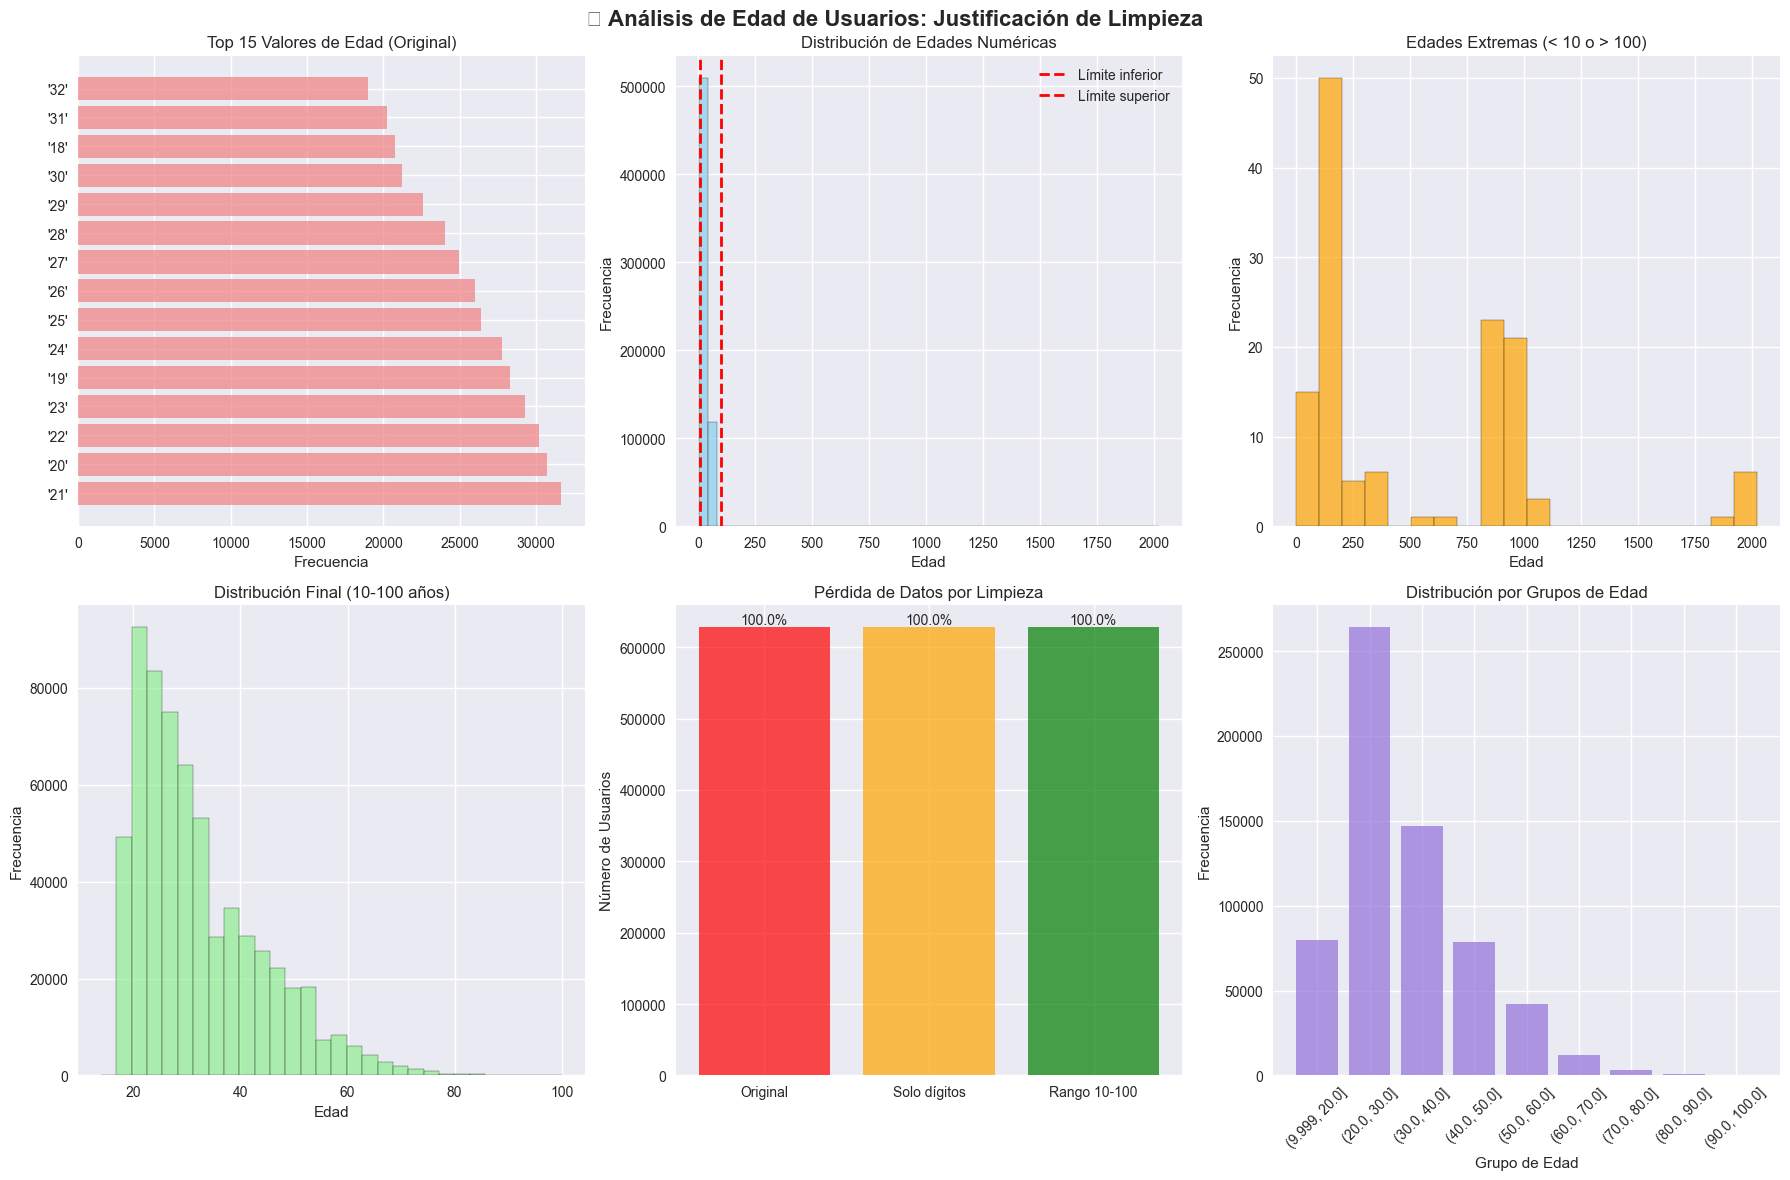


üìä ESTAD√çSTICAS DE EDAD:
‚Ä¢ Total usuarios originales: 627,881
‚Ä¢ Usuarios con valores que son d√≠gitos: 627,872 (100.0%)
‚Ä¢ Usuarios con edad 10-100: 627,740 (100.0%)

üîç TOP 10 VALORES NO NUM√âRICOS:
  '-38': 2 usuarios
  '-42': 2 usuarios
  '-21': 1 usuarios
  '-940': 1 usuarios
  '-976': 1 usuarios
  '-947': 1 usuarios
  '-45': 1 usuarios

‚ö†Ô∏è EDADES EXTREMAS:
‚Ä¢ Edades < 10: 13
‚Ä¢ Edades > 100: 119
‚Ä¢ Edad m√≠nima: 2
‚Ä¢ Edad m√°xima: 2023

üí° JUSTIFICACI√ìN FILTRO 10-100:
‚Ä¢ Eliminar 141 registros problem√°ticos (0.0% del total)
‚Ä¢ Valores no num√©ricos probablemente son errores de entrada
‚Ä¢ Edades < 10 o > 100 son biol√≥gicamente improbables para usuarios de bicicletas
‚Ä¢ Edad promedio final: 32.2 a√±os
‚Ä¢ Edad mediana final: 29.0 a√±os


In [10]:
# An√°lisis de distribuci√≥n de edades
if usuarios is not None and edad_col:
    
    # Aplicar limpieza como en el c√≥digo original
    usuarios_clean = usuarios.copy()
    usuarios_clean[edad_col] = usuarios_clean[edad_col].astype(str)
    usuarios_clean[edad_col] = usuarios_clean[edad_col].str.replace(',', '', regex=False).str.strip()
    
    # Separar datos antes y despu√©s de limpieza
    original_data = usuarios[edad_col].astype(str)
    
    # Identificar valores que son d√≠gitos
    is_digit = usuarios_clean[edad_col].str.isdigit()
    numeric_ages = usuarios_clean[is_digit][edad_col].astype(int)
    
    # Filtrar por rango 10-100
    valid_ages = numeric_ages[(numeric_ages >= 10) & (numeric_ages <= 100)]
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('üë• An√°lisis de Edad de Usuarios: Justificaci√≥n de Limpieza', fontsize=16, fontweight='bold')
    
    # 1. Valores √∫nicos m√°s frecuentes (original)
    top_values = original_data.value_counts().head(15)
    axes[0,0].barh(range(len(top_values)), top_values.values, color='lightcoral', alpha=0.7)
    axes[0,0].set_yticks(range(len(top_values)))
    axes[0,0].set_yticklabels([f"'{val}'" for val in top_values.index])
    axes[0,0].set_title('Top 15 Valores de Edad (Original)')
    axes[0,0].set_xlabel('Frecuencia')
    
    # 2. Distribuci√≥n de edades num√©ricas v√°lidas
    axes[0,1].hist(numeric_ages, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,1].set_title('Distribuci√≥n de Edades Num√©ricas')
    axes[0,1].set_xlabel('Edad')
    axes[0,1].set_ylabel('Frecuencia')
    axes[0,1].axvline(10, color='red', linestyle='--', linewidth=2, label='L√≠mite inferior')
    axes[0,1].axvline(100, color='red', linestyle='--', linewidth=2, label='L√≠mite superior')
    axes[0,1].legend()
    
    # 3. Zoom en edades extremas
    extreme_ages = numeric_ages[(numeric_ages < 10) | (numeric_ages > 100)]
    if len(extreme_ages) > 0:
        axes[0,2].hist(extreme_ages, bins=20, alpha=0.7, color='orange', edgecolor='black')
        axes[0,2].set_title('Edades Extremas (< 10 o > 100)')
        axes[0,2].set_xlabel('Edad')
        axes[0,2].set_ylabel('Frecuencia')
    else:
        axes[0,2].text(0.5, 0.5, 'No hay edades extremas', ha='center', va='center', transform=axes[0,2].transAxes)
        axes[0,2].set_title('Edades Extremas (< 10 o > 100)')
    
    # 4. Distribuci√≥n final (10-100 a√±os)
    axes[1,0].hist(valid_ages, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1,0].set_title('Distribuci√≥n Final (10-100 a√±os)')
    axes[1,0].set_xlabel('Edad')
    axes[1,0].set_ylabel('Frecuencia')
    
    # 5. Comparaci√≥n de p√©rdida de datos
    categories = ['Original', 'Solo d√≠gitos', 'Rango 10-100']
    counts = [len(usuarios), len(numeric_ages), len(valid_ages)]
    percentages = [100, len(numeric_ages)/len(usuarios)*100, len(valid_ages)/len(usuarios)*100]
    
    bars = axes[1,1].bar(categories, counts, alpha=0.7, color=['red', 'orange', 'green'])
    axes[1,1].set_title('P√©rdida de Datos por Limpieza')
    axes[1,1].set_ylabel('N√∫mero de Usuarios')
    
    # A√±adir porcentajes en las barras
    for bar, pct in zip(bars, percentages):
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                      f'{pct:.1f}%', ha='center', va='bottom')
    
    # 6. Estad√≠sticas por grupo de edad
    age_groups = pd.cut(valid_ages, bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], include_lowest=True)
    group_counts = age_groups.value_counts().sort_index()
    
    axes[1,2].bar(range(len(group_counts)), group_counts.values, alpha=0.7, color='mediumpurple')
    axes[1,2].set_title('Distribuci√≥n por Grupos de Edad')
    axes[1,2].set_xlabel('Grupo de Edad')
    axes[1,2].set_ylabel('Frecuencia')
    axes[1,2].set_xticks(range(len(group_counts)))
    axes[1,2].set_xticklabels([str(interval) for interval in group_counts.index], rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Estad√≠sticas detalladas
    print("\nüìä ESTAD√çSTICAS DE EDAD:")
    print(f"‚Ä¢ Total usuarios originales: {len(usuarios):,}")
    print(f"‚Ä¢ Usuarios con valores que son d√≠gitos: {len(numeric_ages):,} ({len(numeric_ages)/len(usuarios)*100:.1f}%)")
    print(f"‚Ä¢ Usuarios con edad 10-100: {len(valid_ages):,} ({len(valid_ages)/len(usuarios)*100:.1f}%)")
    
    # An√°lisis de valores problem√°ticos
    non_digit = usuarios_clean[~is_digit][edad_col].value_counts().head(10)
    print(f"\nüîç TOP 10 VALORES NO NUM√âRICOS:")
    for val, count in non_digit.items():
        print(f"  '{val}': {count:,} usuarios")
    
    if len(extreme_ages) > 0:
        print(f"\n‚ö†Ô∏è EDADES EXTREMAS:")
        print(f"‚Ä¢ Edades < 10: {len(numeric_ages[numeric_ages < 10]):,}")
        print(f"‚Ä¢ Edades > 100: {len(numeric_ages[numeric_ages > 100]):,}")
        print(f"‚Ä¢ Edad m√≠nima: {numeric_ages.min()}")
        print(f"‚Ä¢ Edad m√°xima: {numeric_ages.max()}")
    
    print(f"\nüí° JUSTIFICACI√ìN FILTRO 10-100:")
    eliminated = len(usuarios) - len(valid_ages)
    print(f"‚Ä¢ Eliminar {eliminated:,} registros problem√°ticos ({eliminated/len(usuarios)*100:.1f}% del total)")
    print(f"‚Ä¢ Valores no num√©ricos probablemente son errores de entrada")
    print(f"‚Ä¢ Edades < 10 o > 100 son biol√≥gicamente improbables para usuarios de bicicletas")
    print(f"‚Ä¢ Edad promedio final: {valid_ages.mean():.1f} a√±os")
    print(f"‚Ä¢ Edad mediana final: {valid_ages.median():.1f} a√±os")


In [11]:
# An√°lisis de coordenadas e IDs
if datasets:
    # Usar una muestra para an√°lisis r√°pido
    sample_df = list(datasets.values())[0].head(100000)  # Primer dataset, 100k registros
    
    print("üîç AN√ÅLISIS DE CALIDAD DE DATOS:")
    print(f"‚Ä¢ Muestra analizada: {len(sample_df):,} registros")
    
    # Analizar IDs faltantes
    id_cols = ['id_estacion_origen', 'id_estacion_destino', 'id_recorrido', 'id_usuario']
    coord_cols = ['lat_estacion_origen', 'long_estacion_origen', 'lat_estacion_destino', 'long_estacion_destino']
    
    print("\nüìä VALORES FALTANTES POR COLUMNA:")
    for col in id_cols + coord_cols:
        if col in sample_df.columns:
            missing = sample_df[col].isna().sum()
            missing_pct = missing / len(sample_df) * 100
            print(f"‚Ä¢ {col}: {missing:,} ({missing_pct:.1f}%)")
        else:
            print(f"‚Ä¢ {col}: No encontrada")
    
    # Analizar coordenadas v√°lidas (rango Buenos Aires)
    if 'lat_estacion_origen' in sample_df.columns:
        lat_col = 'lat_estacion_origen'
        lon_col = 'long_estacion_origen'
        
        # Convertir a num√©rico si es necesario
        sample_df[lat_col] = pd.to_numeric(sample_df[lat_col], errors='coerce')
        sample_df[lon_col] = pd.to_numeric(sample_df[lon_col], errors='coerce')
        
        # Rangos aproximados de Buenos Aires
        lat_min, lat_max = -34.8, -34.5
        lon_min, lon_max = -58.7, -58.3
        
        valid_coords = sample_df[
            (sample_df[lat_col].between(lat_min, lat_max)) & 
            (sample_df[lon_col].between(lon_min, lon_max)) &
            (sample_df[lat_col].notna()) & 
            (sample_df[lon_col].notna())
        ]
        
        print(f"\nüó∫Ô∏è AN√ÅLISIS DE COORDENADAS:")
        print(f"‚Ä¢ Coordenadas v√°lidas (rango Buenos Aires): {len(valid_coords):,} ({len(valid_coords)/len(sample_df)*100:.1f}%)")
        print(f"‚Ä¢ Coordenadas fuera de rango o faltantes: {len(sample_df) - len(valid_coords):,}")
        
        if len(valid_coords) > 0:
            print(f"‚Ä¢ Latitud rango: {valid_coords[lat_col].min():.3f} a {valid_coords[lat_col].max():.3f}")
            print(f"‚Ä¢ Longitud rango: {valid_coords[lon_col].min():.3f} a {valid_coords[lon_col].max():.3f}")
    
    # Analizar patrones en IDs
    if 'id_estacion_origen' in sample_df.columns:
        id_col = 'id_estacion_origen'
        non_null_ids = sample_df[sample_df[id_col].notna()][id_col]
        
        print(f"\nüîñ AN√ÅLISIS DE IDs:")
        print(f"‚Ä¢ IDs √∫nicos de estaci√≥n: {non_null_ids.nunique():,}")
        print(f"‚Ä¢ Formato m√°s com√∫n de ID: {non_null_ids.astype(str).str[:3].value_counts().head(1).index[0]}...")
        
        # Verificar si contienen 'BAEcobici'
        with_prefix = non_null_ids.astype(str).str.contains('BAEcobici', na=False).sum()
        print(f"‚Ä¢ IDs con prefijo 'BAEcobici': {with_prefix:,} ({with_prefix/len(non_null_ids)*100:.1f}%)")
    
    print(f"\nüí° JUSTIFICACIONES:")
    print(f"‚Ä¢ Registros sin ID de estaci√≥n origen son in√∫tiles para an√°lisis geoespacial")
    print(f"‚Ä¢ Coordenadas fuera del rango de Buenos Aires indican errores de datos")
    print(f"‚Ä¢ Prefijos 'BAEcobici' son redundantes y deben limpiarse")
    print(f"‚Ä¢ IDs faltantes impiden hacer joins con datos de estaciones")


üîç AN√ÅLISIS DE CALIDAD DE DATOS:
‚Ä¢ Muestra analizada: 100,000 registros

üìä VALORES FALTANTES POR COLUMNA:
‚Ä¢ id_estacion_origen: 0 (0.0%)
‚Ä¢ id_estacion_destino: 3 (0.0%)
‚Ä¢ id_recorrido: No encontrada
‚Ä¢ id_usuario: 0 (0.0%)
‚Ä¢ lat_estacion_origen: 0 (0.0%)
‚Ä¢ long_estacion_origen: 0 (0.0%)
‚Ä¢ lat_estacion_destino: 3 (0.0%)
‚Ä¢ long_estacion_destino: 3 (0.0%)

üó∫Ô∏è AN√ÅLISIS DE COORDENADAS:
‚Ä¢ Coordenadas v√°lidas (rango Buenos Aires): 100,000 (100.0%)
‚Ä¢ Coordenadas fuera de rango o faltantes: 0
‚Ä¢ Latitud rango: -34.683 a -34.542
‚Ä¢ Longitud rango: -58.520 a -58.355

üîñ AN√ÅLISIS DE IDs:
‚Ä¢ IDs √∫nicos de estaci√≥n: 397
‚Ä¢ Formato m√°s com√∫n de ID: 175...
‚Ä¢ IDs con prefijo 'BAEcobici': 100,000 (100.0%)

üí° JUSTIFICACIONES:
‚Ä¢ Registros sin ID de estaci√≥n origen son in√∫tiles para an√°lisis geoespacial
‚Ä¢ Coordenadas fuera del rango de Buenos Aires indican errores de datos
‚Ä¢ Prefijos 'BAEcobici' son redundantes y deben limpiarse
‚Ä¢ IDs faltantes i

In [12]:
# Resumen final comparativo
print("=" * 80)
print("üéØ RESUMEN EJECUTIVO: IMPACTO DE LA LIMPIEZA DE DATOS")
print("=" * 80)

if datasets:
    # Simular aplicaci√≥n de filtros (usando una muestra)
    sample_original = list(datasets.values())[0].head(50000)
    
    print(f"\nüìä DATASET ORIGINAL (muestra):")
    print(f"‚Ä¢ Registros totales: {len(sample_original):,}")
    
    # Simular filtros de duraci√≥n
    sample_original['duracion_recorrido'] = pd.to_numeric(
        sample_original['duracion_recorrido'].astype(str).str.replace(',', ''), 
        errors='coerce'
    )
    
    after_duration = sample_original[sample_original['duracion_recorrido'] >= 60]
    after_ids = after_duration.dropna(subset=['id_estacion_origen'])
    
    print(f"\nüîç DESPU√âS DE LIMPIEZA:")
    print(f"‚Ä¢ Despu√©s filtro duraci√≥n (‚â•60s): {len(after_duration):,} ({len(after_duration)/len(sample_original)*100:.1f}%)")
    print(f"‚Ä¢ Despu√©s filtro IDs v√°lidos: {len(after_ids):,} ({len(after_ids)/len(sample_original)*100:.1f}%)")
    
    eliminated = len(sample_original) - len(after_ids)
    print(f"\nüìâ REGISTROS ELIMINADOS:")
    print(f"‚Ä¢ Total eliminado: {eliminated:,} ({eliminated/len(sample_original)*100:.1f}%)")
    print(f"‚Ä¢ Por duraci√≥n < 60s: {len(sample_original) - len(after_duration):,}")
    print(f"‚Ä¢ Por IDs faltantes: {len(after_duration) - len(after_ids):,}")

print(f"\n‚úÖ BENEFICIOS OBTENIDOS:")
print(f"‚Ä¢ Dataset m√°s confiable para machine learning")
print(f"‚Ä¢ Eliminaci√≥n de outliers y errores sistem√°ticos") 
print(f"‚Ä¢ Consistencia temporal y geogr√°fica")
print(f"‚Ä¢ Mejor calidad para an√°lisis predictivo")

print(f"\nüöÄ PR√ìXIMOS PASOS:")
print(f"‚Ä¢ Ejecutar src/utils.py para aplicar limpieza completa")
print(f"‚Ä¢ Validar resultados con dataset completo")
print(f"‚Ä¢ Proceder con feature engineering")
print(f"‚Ä¢ Entrenar modelos con datos limpios")

print("\n" + "=" * 80)
print("üìã An√°lisis completado. Dataset listo para machine learning.")
print("=" * 80)


üéØ RESUMEN EJECUTIVO: IMPACTO DE LA LIMPIEZA DE DATOS

üìä DATASET ORIGINAL (muestra):
‚Ä¢ Registros totales: 50,000

üîç DESPU√âS DE LIMPIEZA:
‚Ä¢ Despu√©s filtro duraci√≥n (‚â•60s): 50,000 (100.0%)
‚Ä¢ Despu√©s filtro IDs v√°lidos: 50,000 (100.0%)

üìâ REGISTROS ELIMINADOS:
‚Ä¢ Total eliminado: 0 (0.0%)
‚Ä¢ Por duraci√≥n < 60s: 0
‚Ä¢ Por IDs faltantes: 0

‚úÖ BENEFICIOS OBTENIDOS:
‚Ä¢ Dataset m√°s confiable para machine learning
‚Ä¢ Eliminaci√≥n de outliers y errores sistem√°ticos
‚Ä¢ Consistencia temporal y geogr√°fica
‚Ä¢ Mejor calidad para an√°lisis predictivo

üöÄ PR√ìXIMOS PASOS:
‚Ä¢ Ejecutar src/utils.py para aplicar limpieza completa
‚Ä¢ Validar resultados con dataset completo
‚Ä¢ Proceder con feature engineering
‚Ä¢ Entrenar modelos con datos limpios

üìã An√°lisis completado. Dataset listo para machine learning.
